In [126]:
import pandas as pd
import plotly.express as px
import plotly.subplots as subplots
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer

# Are there any symbols have the same trends?

In [127]:
prices_df = pd.read_csv("../../datastore/data.csv")
prices_df

,Symbol,base,quote,Kline open time,Open price,High price,Low price,Close price,Volume,Kline Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
0,ETHBTC,ETH,BTC,1669395600000,0.072026,0.072222,0.072026,0.072222,1342.1624,1669397399999,96.776126,2657,794.6663,57.298344
1,ETHBTC,ETH,BTC,1669397400000,0.072222,0.072335,0.072117,0.072162,1185.9640,1669399199999,85.640393,2727,560.9044,40.508977
2,ETHBTC,ETH,BTC,1669399200000,0.072163,0.072263,0.072101,0.072189,813.4793,1669400999999,58.717779,1862,359.8931,25.975732
3,ETHBTC,ETH,BTC,1669401000000,0.072188,0.072261,0.072161,0.072212,936.2168,1669402799999,67.599402,1816,470.6928,33.988586
4,ETHBTC,ETH,BTC,1669402800000,0.072223,0.072479,0.072197,0.072375,1115.5725,1669404599999,80.727099,3088,593.4310,42.945939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222237,BUSDRON,BUSD,RON,1670943600000,4.629000,4.630000,4.620000,4.621000,5984.0000,1670945399999,27672.337000,108,2086.0000,9651.160000
1222238,BUSDRON,BUSD,RON,1670945400000,4.620000,4.631000,4.620000,4.630000,3618.0000,1670947199999,16734.982000,42,1642.0000,7593.482000
1222239,BUSDRON,BUSD,RON,1670947200000,4.631000,4.631000,4.630000,4.631000,3254.0000,1670948999999,15069.018000,33,2998.0000,13883.738000
1222240,BUSDRON,BUSD,RON,1670949000000,4.630000,4.631000,4.630000,4.631000,14415.0000,1670950799999,66749.027000,92,7577.0000,35089.087000


## 1. Convert the origin price table, each symbol has its own column

In [128]:
grouped_df = prices_df.pivot_table(index="Kline open time", columns="Symbol", values="Open price").reset_index()

# Convert the index to datetime
grouped_df["Kline open time"] = pd.to_datetime(grouped_df["Kline open time"], unit="ms")

<AxesSubplot:>

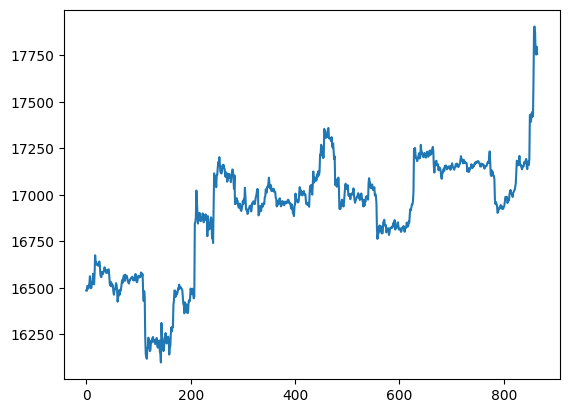

In [129]:
grouped_df["BTCUSDT"].plot()

## 2. Up down percentage of each symbol in each time period

In [130]:
grouped_df.drop("Kline open time", axis=1, inplace=True)

In [131]:
im = SimpleImputer(strategy="mean")
grouped_df = pd.DataFrame(im.fit_transform(grouped_df), columns=grouped_df.columns)
grouped_df.loc[grouped_df.isna().any(axis=1)]

Symbol,1INCHBTC,1INCHBUSD,1INCHUSDT,AAVEBNB,AAVEBTC,AAVEBUSD,AAVEETH,AAVEUSDT,ACABTC,ACABUSD,...,ZILBNB,ZILBTC,ZILBUSD,ZILETH,ZILTRY,ZILUSDT,ZRXBTC,ZRXBUSD,ZRXETH,ZRXUSDT


In [132]:
df_1 = grouped_df.drop(grouped_df.index[[0]]).reset_index().drop("index", axis=1)
df_2 = grouped_df.drop(grouped_df.index[[-1]]).reset_index().drop("index", axis=1)

percent_df = df_1.subtract(df_2).divide(df_2)
percent_df

Symbol,1INCHBTC,1INCHBUSD,1INCHUSDT,AAVEBNB,AAVEBTC,AAVEBUSD,AAVEETH,AAVEUSDT,ACABTC,ACABUSD,...,ZILBNB,ZILBTC,ZILBUSD,ZILETH,ZILTRY,ZILUSDT,ZRXBTC,ZRXBUSD,ZRXETH,ZRXUSDT
0,0.002876,0.001938,0.003876,-0.003543,-0.002503,-0.001689,-0.002008,-0.001689,-0.005926,-0.012534,...,-0.003937,0.007246,0.000438,-0.003119,0.002294,0.003951,0.005164,0.001040,0.000000,0.004695
1,-0.003824,-0.001934,-0.001931,-0.004571,-0.003624,-0.003384,-0.004024,-0.001692,0.001490,0.005440,...,0.000000,-0.007194,-0.000876,-0.002086,-0.002288,-0.002624,-0.001712,-0.000519,-0.008610,-0.001558
2,-0.000320,0.000000,0.000000,0.002551,0.001959,0.003396,0.002020,0.001695,-0.001488,0.000902,...,-0.001318,0.007246,0.002632,-0.001045,-0.002294,0.003069,0.002573,0.002599,0.008685,0.002080
3,0.001280,-0.003876,0.000000,0.000000,-0.000838,-0.001692,0.000000,-0.001692,-0.001490,-0.005405,...,0.002639,0.000000,-0.002625,0.001569,0.000000,-0.003497,-0.002566,-0.002074,-0.003690,-0.000519
4,0.000320,0.005837,0.000000,0.001527,0.002236,0.003390,0.000000,0.005085,0.010448,0.012681,...,-0.002632,-0.007194,0.003509,-0.002089,0.002299,0.003509,0.001715,0.004675,-0.000617,0.001558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,-0.002437,-0.002268,-0.002273,0.000442,-0.004802,-0.006309,-0.002114,-0.006309,0.001333,-0.002983,...,0.001248,0.008065,-0.002236,0.002397,-0.002370,-0.002683,-0.002778,-0.006205,0.000000,-0.006198
860,-0.001629,-0.009091,-0.009112,0.001325,-0.004258,-0.011111,-0.004237,-0.011111,-0.031957,-0.029170,...,0.002494,-0.008000,-0.007172,-0.001793,-0.009501,-0.007175,-0.006500,-0.009365,-0.009003,-0.010395
861,-0.000408,-0.002294,0.002299,0.003529,0.000285,-0.001605,0.000000,0.000000,-0.008253,-0.013097,...,0.006219,0.000000,0.000000,0.002395,0.002398,0.000903,0.000935,0.001576,-0.000699,-0.002101
862,0.000408,0.004598,0.002294,-0.001319,-0.001425,0.003215,0.000000,0.001605,-0.004161,0.001561,...,0.002472,0.008065,0.003160,0.000597,0.002392,0.002256,0.000934,0.000000,0.008392,0.004737


## 3. Compare each column with each other

In [133]:
threshold = 0.2
exceptable_error_length = int(percent_df.shape[0] * threshold)
exceptable_error_length

172

In [134]:
resemble_trend_pairs = []
diff_trend_pairs = []

for col_i in range(percent_df.columns.__len__()):
    for next_col_i in range(col_i, percent_df.columns.__len__()):
        if col_i == next_col_i:
            continue
        singal_df = percent_df[percent_df.columns[col_i]] * percent_df[percent_df.columns[next_col_i]]
        if singal_df[singal_df == 0].__len__() > exceptable_error_length:
            continue
        if singal_df[singal_df < 0].__len__() < exceptable_error_length:
            resemble_trend_pairs.append([percent_df.columns[col_i], percent_df.columns[next_col_i]])
        if singal_df[singal_df > 0].__len__() < exceptable_error_length:
            diff_trend_pairs.append([percent_df.columns[col_i], percent_df.columns[next_col_i]])

### There are some symbols have the same trend

In [150]:
resemble_trend_pairs[:10]

[['ACABTC', 'ACABUSD'],
 ['ACABTC', 'ACAUSDT'],
 ['ACABUSD', 'ACAUSDT'],
 ['ACMBUSD', 'ACMUSDT'],
 ['ADABIDR', 'ADABUSD'],
 ['ADABIDR', 'ADAEUR'],
 ['ADABIDR', 'ADAUSDT'],
 ['ADABRL', 'ADABUSD'],
 ['ADABRL', 'ADAEUR'],
 ['ADABRL', 'ADAGBP']]

### Let look at one of pairs

- The same trends

In [136]:
example_pair = resemble_trend_pairs[1]
example_pair

['ACABTC', 'ACAUSDT']

In [137]:
a = (percent_df[example_pair[1]] * percent_df[example_pair[0]])
a[a < 0].__len__()

135

<AxesSubplot:>

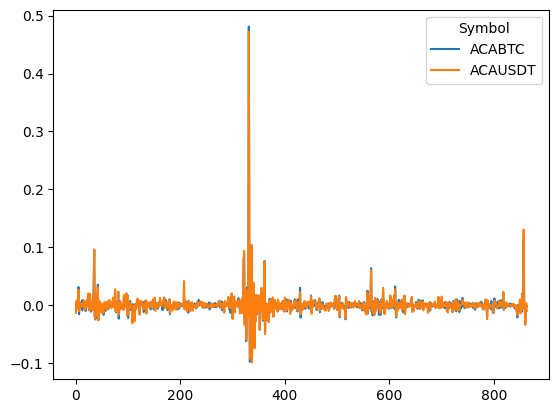

In [138]:
percent_df[example_pair].plot()

In [144]:
fig = subplots.make_subplots(rows=1, cols=2)

for symbol_i in range(example_pair.__len__()):
    fig.add_trace(
        go.Line(x=grouped_df.index, y=grouped_df[example_pair[symbol_i]], name=example_pair[symbol_i]),
        row=1, col=(symbol_i + 1)
    )
fig.show()

- Inverse trends

In [146]:
example_pair = diff_trend_pairs[1]
example_pair

['ADABUSD', 'ADADOWNUSDT']

<AxesSubplot:>

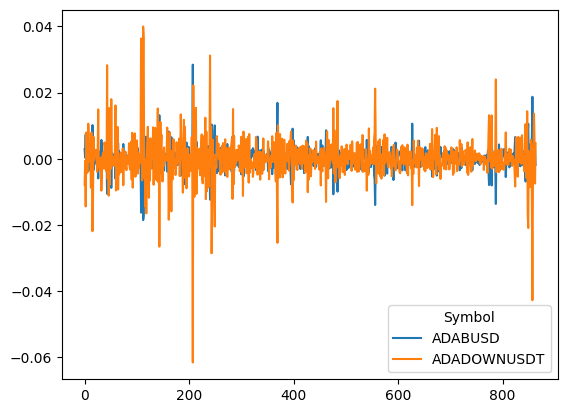

In [149]:
percent_df[example_pair].plot()

In [148]:
fig = subplots.make_subplots(rows=1, cols=2)

for symbol_i in range(example_pair.__len__()):
    fig.add_trace(
        go.Line(x=grouped_df.index, y=grouped_df[example_pair[symbol_i]], name=example_pair[symbol_i]),
        row=1, col=(symbol_i + 1)
    )
fig.show()